# Ch3. Neural Network Introduction
パーセプトロンのような、入力信号を受け取って出力信号を出すものを複数層にわたって繋げていくことによってニューラルネットワークができる

---

## 活性化関数
### ステップ関数

パーセプトロンで用いた式

\begin{equation}y= \left \{\begin{array}{l}0& (b+w_1x_1+w_2x_2\leqq0) \\1& (b+w_1x_1+w_2x_2>0) \\\end{array}\right.\end{equation}

場合分けの部分を関数$h(x)$で置き換える

\begin{equation}y=h(b+w_1x_1+w_2x_2)\end{equation}

\begin{equation}h(x)= \left \{\begin{array}{l}0& (x\leqq0) \\1& (x>0) \\\end{array}\right.\end{equation}

$h(x)$は__活性化関数__(activation function)と呼ばれる．

ここで，パーセプトロンの図を描きかえる．

<img src="image\simple neuron.jpg" width="200" alt="simple neuron"/>

バイアス$b$も信号1を重みづけしたものであると考えることができる．  
重みづけされた入力信号の合計を$a$とすることで活性化関数を図示することができる．

今まで用いたこの活性化関数はステップ関数と呼ばれる．

\begin{equation}h(x)= \left \{\begin{array}{l}0& (x\leqq0) \\1& (x>0) \\\end{array}\right.\end{equation}

In [1]:
import numpy as np

def step(x):    #numpy配列を受け取る
    return np.array(x > 0, dtype=np.int)    #bool型をint型に変換

In [2]:
x = np.array([-1, 1, 2])
step(x)

array([0, 1, 1])

### シグモイド関数

ニューラルネットワークでよく使われる活性化関数として__シグモイド関数__(sigmoid function)がある．

\begin{equation}h(x)= \frac{1}{1+e^{-x}} \end{equation}

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

これらの関数をグラフ化する

In [5]:
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)    #-5から5の間を0.1刻みでNumPy配列を生成
y_stp = step(x)
y_sig = sigmoid(x)

plt.plot(x, y_stp, label = "step function")
plt.plot(x, y_sig, label = "sigmoid function")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.1, 1.1)    #y軸の範囲
plt.legend(loc = "lower right")
plt.show()

ステップ関数の値は離散的であるのに対し．シグモイド関数の値は連続的であり，なめらかな曲線を描く．  

### ReLU関数

また，最近ではReLU(Rectified Linear Unit)という関数が用いられている．

\begin{equation}h(x)= \left \{\begin{array}{l}x& (x>0) \\0& (x\leqq0) \\\end{array}\right.\end{equation}

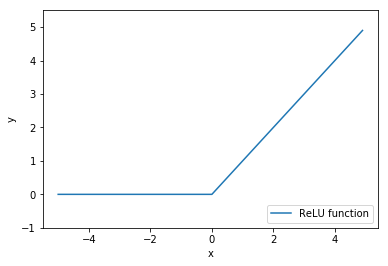

In [6]:
def relu_function(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)    #-5から5の間を0.1刻みでNumPy配列を生成
y = relu_function(x)

plt.plot(x, y, label = "ReLU function")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1.0, 5.5)    #y軸の範囲
plt.legend(loc = "lower right")
plt.show()

## 3層ニューラルネットワークの実装

次のニューラルネットワークを考える．

<img src="image\3-layer nn1.jpg" width="400" alt="3-layer nn1"/>

1層目の1番目のニューロンから考えていく．

<img src="image\3-layer nn2.jpg" width="400" alt="3-layer nn2"/>

バイアスのためのニューロン$b$を追加した．  
記号$w_{pq}^{(n)}$は，$p$番目のニューロンに$q$番目のニューロンから伸びる$n$層目の重みを表し，$b_p^{(n)}$は，$p$番目のニューロンに伸びる$n$層目のバイアスを表す．

\begin{equation}a_1^{(1)}=w_{11}^{(1)}x_1+w_{12}^{(1)}x_2+b_1^{(1)}\end{equation}

が成り立つが，ここで$a,x,b,w$を行列として考える．

\begin{equation}
A^{(1)} = \left(
    \begin{array}{ccc}
      a_1^{(1)} & a_2^{(1)} & a_3^{(1)}
    \end{array}
  \right),\ 
X = \left(
    \begin{array}{ccc}
      x_1 & y_2
    \end{array}
\right),\ 
B^{(1)} = \left(
    \begin{array}{ccc}
      b_1^{(1)} & b_2^{(1)} & b_3^{(1)}
    \end{array}
\right),\ 
W^{(1)} = \left(
    \begin{array}{ccc}
      w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
      w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
    \end{array}
  \right)
\end{equation}

次の層への信号の伝達は行列の内積で計算することができる．

\begin{equation} A^{(1)}=XW^{(1)}+B^{(1)} \end{equation}

In [7]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1

続いて，活性化関数によるプロセスを考える．ここではシグモイド関数を使う．

<img src="image\3-layer nn3.jpg" width="400" alt="3-layer nn3"/>

In [8]:
Z1 = sigmoid(A1)

In [9]:
print(A1)

[0.3 0.7 1.1]


In [10]:
print(Z1)

[0.57444252 0.66818777 0.75026011]


第2層，第3層についても同様に行う．

<img src="image\3-layer nn4.jpg" width="450" alt="3-layer nn4"/>

In [11]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3

最後に出力層を活性化関数にかける．ここでは，入力をそのまま出力する**恒等関数(identify function)**を用いる．

<img src="image\3-layer nn5.jpg" width="450" alt="3-layer nn5"/>

In [12]:
def identify_function(x):
    return x

Y = identify_function(A3)

print(Y)

[0.31682708 0.69627909]


## まとめ

ここまでの実装を一つのコードにまとめる

In [13]:
def init_network():    #重み，バイアスをディクショナリ型として初期化
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):    #ニューラルネットワーク内の伝達処理
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)
    
    return y

network = init_network()    #ネットワークを指定
x = np.array([1.0, 0.5])    #入力値を指定
y = forward(network, x)    #伝達処理
print(y)    #出力

[0.31682708 0.69627909]


## 出力層の設計

出力層の活性化関数は，回帰問題では恒等関数を，分類問題ではソフトマックス関数を用いる．
- 回帰問題(regression probrem)…連続値を予測(ex.株価指数に基づいた株価の予測)
- 分類問題(classification probrem)…離散値を予測(ex.画像による性別の分類)

恒等関数は入力値をそのまま返すだけである．
ソフトマックス関数は次の式で表される．

\begin{equation}
y_k=\frac{\exp(a_k)}{\displaystyle \sum^n_{i=1}\exp(a_i)}
\end{equation}

出力の各ニューロンが出力層のすべての入力信号から影響を受ける．

In [14]:
def softmax(a):    #np.arrayを受け取る
    exp_a = np.exp(a)    #各要素に関して指数関数に入れる
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

しかし，要素の値が大きいと簡単にオーバーフローする

In [15]:
# Warningが出る
a = np.array([1010, 1000, 990])
softmax(a)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan, nan, nan])

これは、ソフトマックス関数の式変形により改善することができる．

\begin{eqnarray*}
y_k=\frac{\exp(a_k)}{\displaystyle \sum^n_{i=1}\exp(a_i)}&=&\frac{C\exp(a_k)}{C\displaystyle \sum^n_{i=1}\exp(a_i)}\\
&=&\frac{\exp(a_k+\log C)}{\displaystyle \sum^n_{i=1}\exp(a_i+\log C)}\\
&=&\frac{\exp(a_k+C')}{\displaystyle \sum^n_{i=1}\exp(a_i+C')}
\end{eqnarray*}

上記の式より，指数関数内で任意の定数$C'$を加えても結果は変わらないことになる．  
そこで，$C'=-{\rm max}(a)$とすることでオーバーフローの発生を減らすことができる．

In [16]:
def softmax(a):    #np.arrayを受け取る
    c = np.max(a)
    exp_a = np.exp(a - c)    #各要素に関して指数関数に入れる
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [17]:
a = np.array([1010, 1000, 990])
y = softmax(a)
print(y)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [18]:
np.sum(y)

1.0

ソフトマックス関数の出力は0から1.0の間をとる．また，出力の総和は1となる．つまり，出力の各要素を確率としてとらえることができる．
しかし，ソフトマックス関数を適用しても各要素の大小関係は変わらないため，学習フェーズでは確率を求めるのに有効であるが，推論フェーズでは計算量が多いため省略されるのが一般的である．

In [19]:
import sys, os
sys.path.append('sample')    #sampleフォルダを追加
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


# MNIST dataset
MNISTのデータは、手書きで書かれた数字を画像にした画像データ(image)と、その画像に書かれた数字を表すラベルデータ(label)から構成される。  
(学習済みのパラメータによる推論処理は省略)

In [20]:
from dataset.mnist import load_mnist  #MNISTデータセットを読み込む関数

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
#load_mnist関数  (訓練画像, 訓練ラベル), (テスト画像, テストラベル) を返す
#引数 normalize:0.0～1.0に正規化 flatten:1次元配列にする one_hot_label:one-hot表現として格納

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


上のコードにより，MNISTデータセットを読み込んだ．  
出力結果は，各画像は$28\times28=784$の要素を持つ情報から成り，訓練画像は60000枚，テスト画像は10000枚あることを示す．

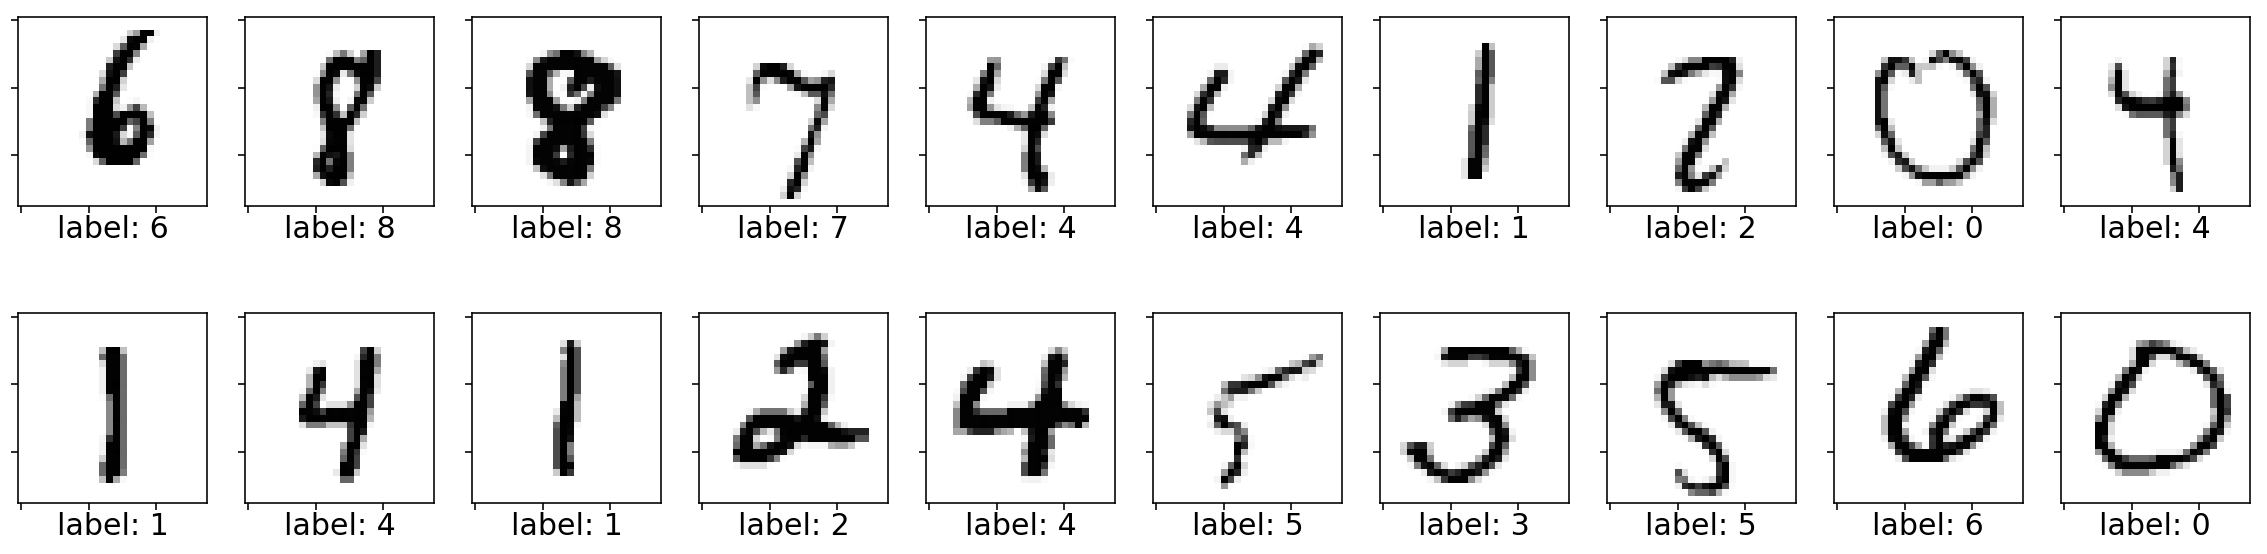

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.subplots(2,10,figsize=(20, 5))    #2×10枚の画像を20×5のキャンバス内に展開

for i in range(20):
    img_index = np.random.randint(x_test.shape[0])
    img = x_test[img_index]    #imgに各画像が入る
    label = t_test[img_index]
    plt.subplot(2, 10, i + 1)
    plt.tick_params(which='both',labelleft='off', labelbottom='off')    #軸の数字を消す
    plt.xlabel("label: " + str(label), fontsize=15)    #ラベルを図の下に表示
    #plt.title("label: " + str(label))    #ラベルを表示
    img = img.reshape(28, 28)    #1次元配列を2次元配列に直す
    plt.imshow(img, cmap = cm.Greys)    #白黒画像で表示

MNISTの画像の一部を表示した．このデータセットには手書き数字の画像とその答えを示すラベルが入っている．

今回は用意されたニューラルネットワークを用いて，認識精度を計測していく．

In [22]:
import pickle

def get_data():    #画像，ラベル読み込み
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():    #用意されたニューラルネットワークを読み込む
    with open("sample\sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']    #3層ニューラルネットワーク
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

一枚の画像について分類を行い，各数字である確率を棒グラフで表示する．

In [23]:
x, t = get_data()
network = init_network()

img = x[4]    #5枚目の画像を指定
label = t[4]

y = predict(network, img)    #分類を実行

plt.subplots(1,2,figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.xlabel("label: " + str(label), fontsize=20)
img = img.reshape(28, 28)    #1次元配列を2次元配列に直す
plt.tick_params(which='both',labelleft='off', labelbottom='off')    #軸の数字を消す
plt.imshow(img, cmap = cm.Greys)    #白黒画像で表示

plt.subplot(1, 2, 2)
plt.bar(range(10), y, align = "center")    #棒グラフを表示
plt.xticks(range(10))
plt.xlabel("Number", fontsize=15)
plt.ylabel("Probablity", fontsize=15)

FileNotFoundError: [Errno 2] No such file or directory: 'sample\\sample_weight.pkl'

棒グラフの通り，数字が認識できていることが分かる．

次に，テスト画像10000枚全ての分類を行い，このニューラルネットワークの精度を計測する．

In [ ]:
accuracy_cnt = 0    #正解回数
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) #最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1
        
print("Trial:" + str(len(x)))
print("Correct: " + str(accuracy_cnt))
print("Wrong: " + str(len(x) - accuracy_cnt))
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

以上の結果により，認識精度は93.52%であることが分かる．